使用预测分析预测乳腺肿瘤的诊断

1.识别问题
    乳腺癌是女性最常见的恶性肿瘤，占美国女性确诊癌症的近三分之一，是女性癌症死亡的第二大原因。 乳腺癌是乳房组织细胞异常生长的结果，通常称为肿瘤。 肿瘤并不意味着癌症——肿瘤可以是良性（非癌性）、恶性前（癌前）或恶性（癌性）。 MRI、乳房X光检查、超声波和活组织检查等测试通常用于诊断所进行的乳腺癌。

1.1预期的结果
    原理：乳房细针抽吸 (FNA) 测试鉴定乳腺癌（这是一种快速且简单的程序，该程序可以从乳房病变或囊肿（肿块、溃疡或肿胀）中取出一些液体或细胞，用类似于 血样针）。    
通过检测数据和标签构建模型，实现对乳腺癌肿瘤进行分    

1 = 恶性 (癌    性)
0 = 良性 (非    癌性)
很明显，这是一个二类的函数。

1.2目标
    由于数据中的标签是离散的，因此预测分为两类，即。恶性的或良性的。
在机器学习中，这是一个分类问题。因此，目的是对乳腺癌的良恶性进行分类，并预测一定时期后恶性病例的复发和不复发。为了实现这一点，我们使用机器学习分类方法来拟合一个可以预测所有新输入的离散类的函数。

1.3识别数据源
    乳腺癌数据集是由加州大学欧文分校维护的机器学习存储库(https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
)
。该数据集包含569个恶性和良性肿瘤细胞样本
    数据集中的前两列分别存储了样本的唯一ID号和相应的诊断(M=恶性，B=良性)。列中3-32包含30个实值特征，这些实值特征是从细胞核数字化图像中计算出来的，可以用来建立预测肿瘤是良性还是恶性的模型。。拉

1.4加载库并设置选项

In [1]:
#加载库
import numpy as np         # 引入np
import pandas as pd        # 引入pd

#读取"data.csv"且打印对应的内容
data = pd.read_csv('data/data.csv', index_col=False,)

1.4.1加载数据集
    首先，使用Pandas read_csv函数中的附加选项加载提供的CSV文件
1.4.2检查数据
    第一步是直观地检查新数据集。有多种方法可以做到这一点:
最简单的方法是使用DataFrame data.head()请求前几行数据内容。
data.head()方法,默认情况下返回DataFrame对象的前5行(不包括标题行)。
或者，也可以使用“dftail()”返回数据的前五行。
对于head和tail方法，都有一个选项可以通过在的括号之间包含所需的数字来指定记录的数量调用任意一个方法。

In [2]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


可以使用drop方法来删除某些行数据，也可使用shape方法检查用例的数量和字段的数量，如下所示。

In [3]:
# Id列是多余的，没有用处，我们想删除它
data.drop('id', axis =1, inplace=True)
#data.drop('行数据名: 0', axis=1, inplace=True)drop方法格式
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [4]:
data.shape

(569, 32)

在显示的结果中，您可以看到数据有569条记录，每条记录有32列，原本是33行，但删除了id这一列。
info()方法提供了数据的简明摘要，从输出中，它提供了每列中数据的类型、每列中非空值的数量，以及数据帧使用了多少内存。
dtypes方法将返回DataFrame中每种类型的列数,如下所示
为每个细胞核计算十个实值特征：
a) 半径（从中心到周边点的平均距离）
b) 纹理（灰度值的标准偏差）
c) 周长
d) 面积
e) 平滑度（半径长度的局部变化）
f) 紧凑性（周长^2/面积 - 1.0）
g) 凹度（轮廓凹入部分的严重程度）
h) 凹点（轮廓凹入部分的数量）
i) 对称性
j) 分形维数（“海岸线近似” - 1）

In [5]:
#查看数据类型info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
#查看DataFrame中每种数据类型的列数
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

从上面的结果来看，从32个变量中，列id号是一个整数，诊断为569非空对象non-null,其余的都是float64。

In [7]:
#检查丢失的变量
data.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

In [8]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

从上面的结果来看，诊断是一个分类变量，因为它代表了一个固定数量的可能值(即Benign的Malignant)。
机器学习算法需要数字，而不是字符串作为输入，所以我们需要一些编码方法来转换它们。

<Axes: xlabel='diagnosis'>

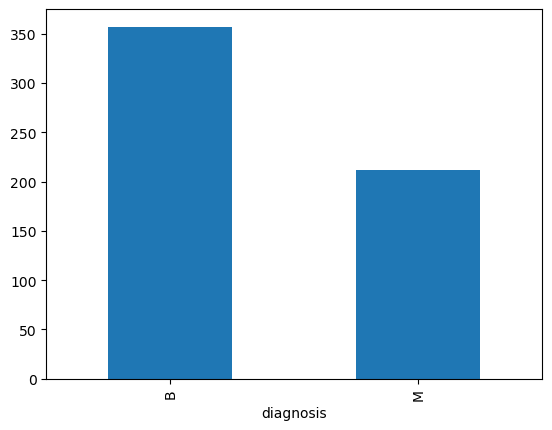

In [9]:
# 对标签进行统计
data.diagnosis.value_counts().plot(kind = "bar")

良性：恶性 大约为2：1. 在机器学习中最好是正负样本1：1，但是2：1也可以进行正常的分类预测。

In [10]:
##保存数据框架的清晰版本以供将来分析
data.to_csv('data/save-data.csv')

现在我们对数据有了很好的直观感觉，下一步包括更仔细地查看属性和数据值。